In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [22]:
df.shape

(374, 13)

In [73]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop(
    'Blood Pressure', axis=1)
df1=df1.rename(columns={0: 'BloodPressure_high', 1: 'BloodPressure_low'})
df1['BloodPressure_high'] = df1['BloodPressure_high'].astype(float)
df1['BloodPressure_low'] = df1['BloodPressure_low'].astype(float)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BloodPressure_high       374 non-null    float64
 13  BloodPressure_low        374 non-null    float64
dtypes: float64(3), int64(7), o

<AxesSubplot:>

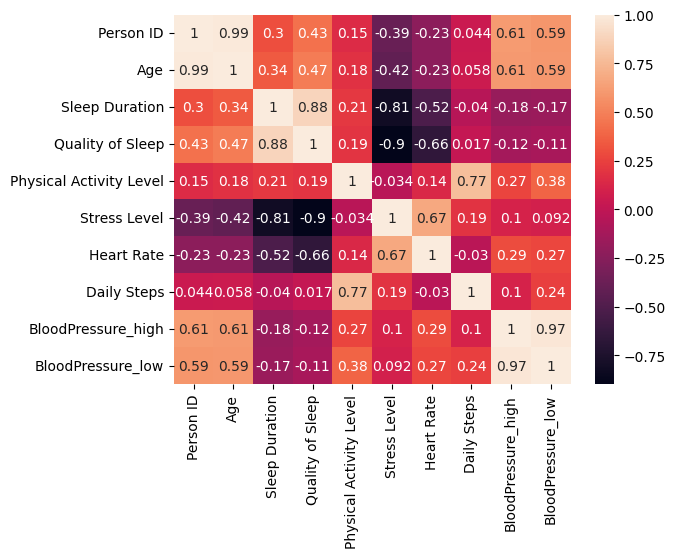

In [28]:
sns.heatmap(df1.corr(), annot=True)

Text(0.5, 0, 'Quality of Sleep')

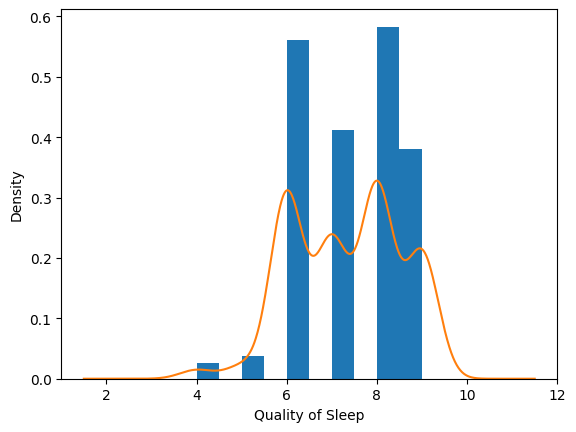

In [29]:
df1['Quality of Sleep'].hist(density=True)

df1['Quality of Sleep'].plot(kind='kde')
plt.xlabel('Quality of Sleep')

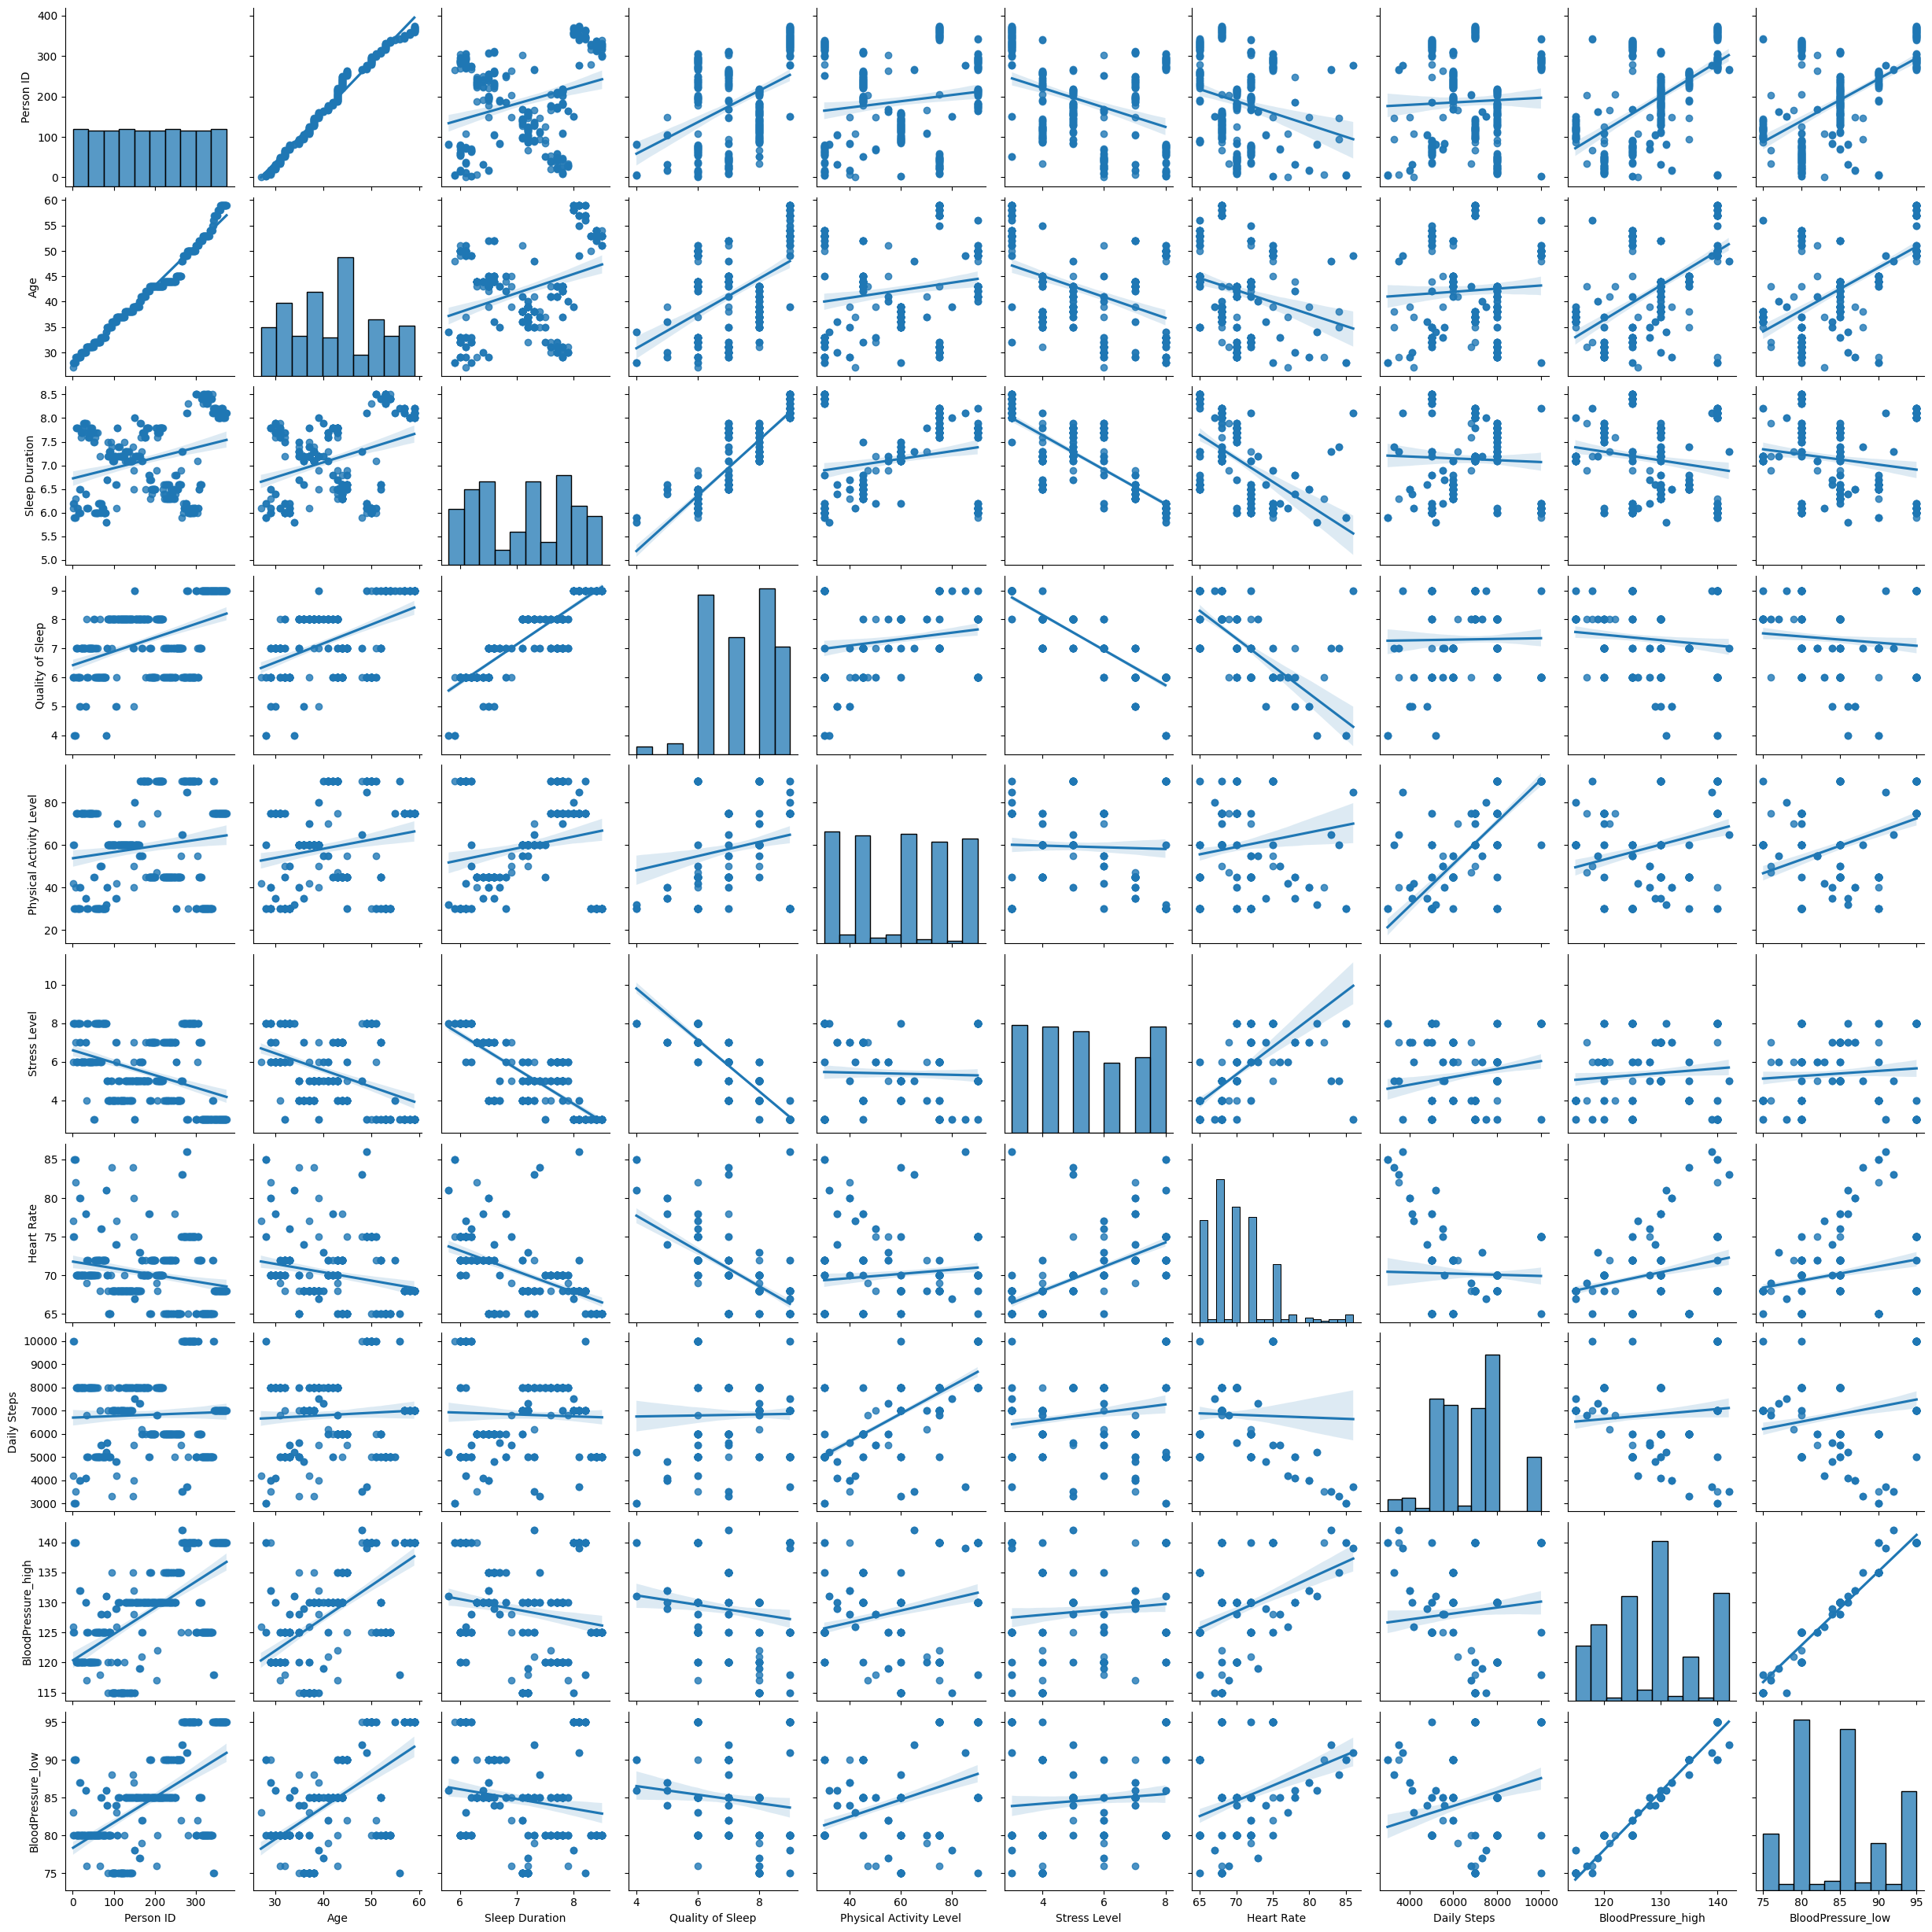

In [30]:
sns.pairplot(data=df1, kind='reg')

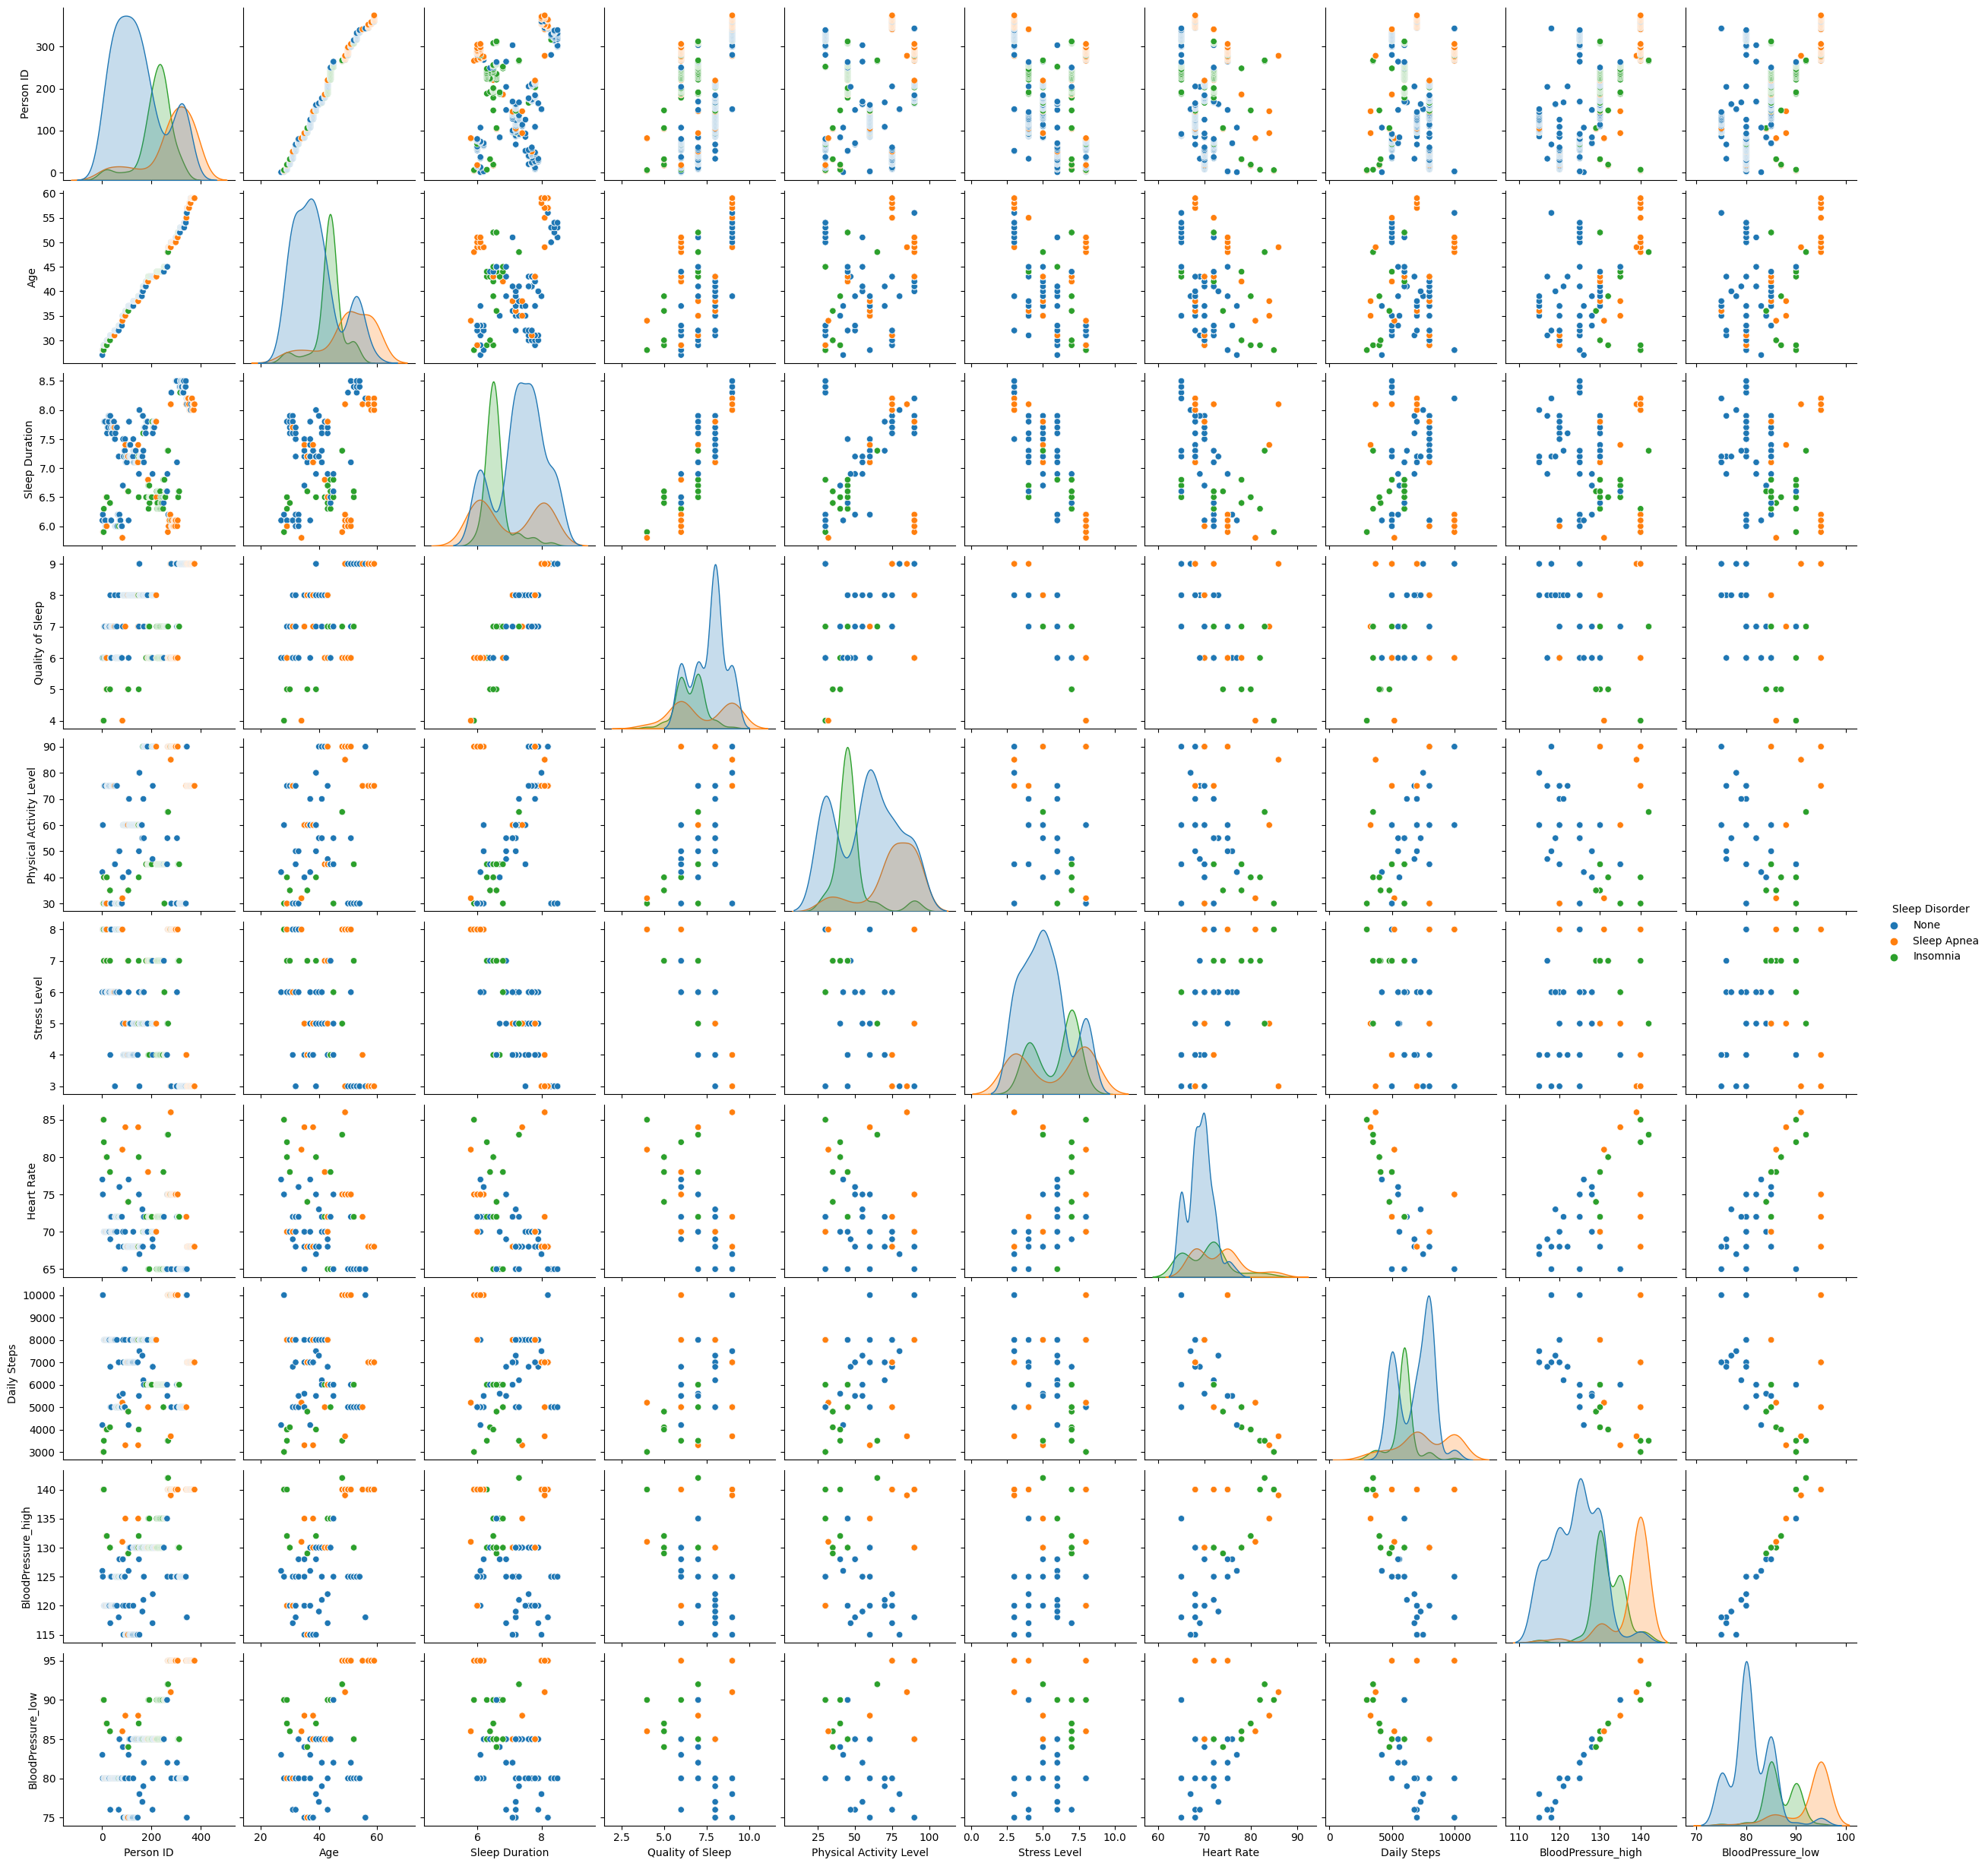

In [31]:
sns.pairplot(df1,hue='Sleep Disorder')

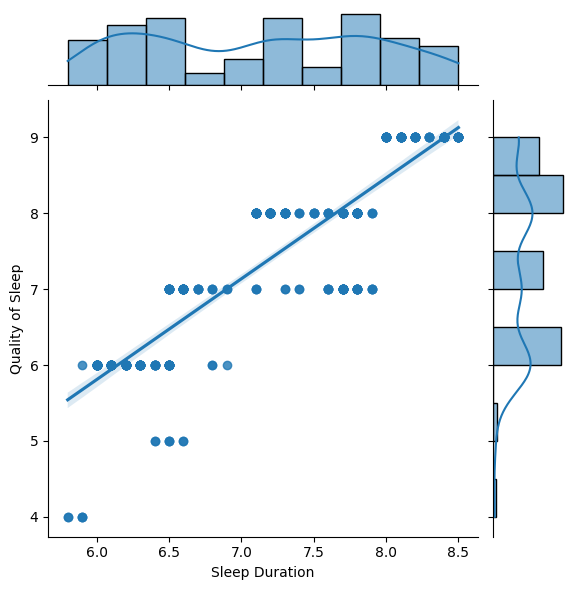

In [32]:
sns.jointplot(data=df1, x='Sleep Duration', y='Quality of Sleep',  kind='reg')

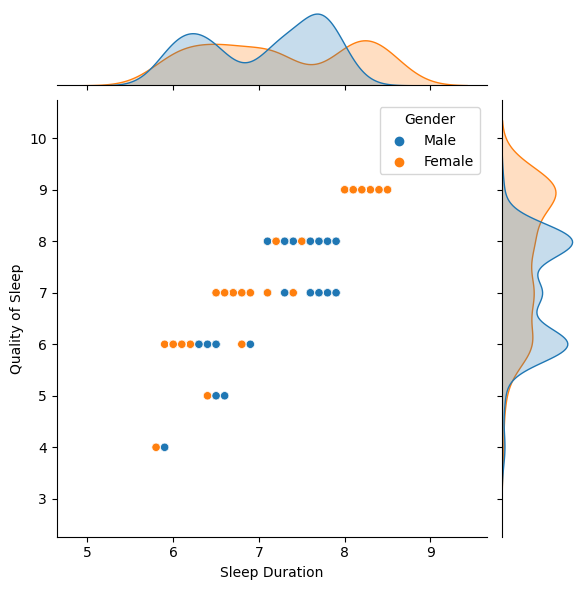

In [33]:
sns.jointplot(data=df1, x='Sleep Duration', y='Quality of Sleep',  hue='Gender')

In [42]:
num_col = df1.dtypes != 'object'
num_col = list(num_col[num_col == True].index)

In [45]:
num_col= num_col[1:]
num_col

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'BloodPressure_high',
 'BloodPressure_low']

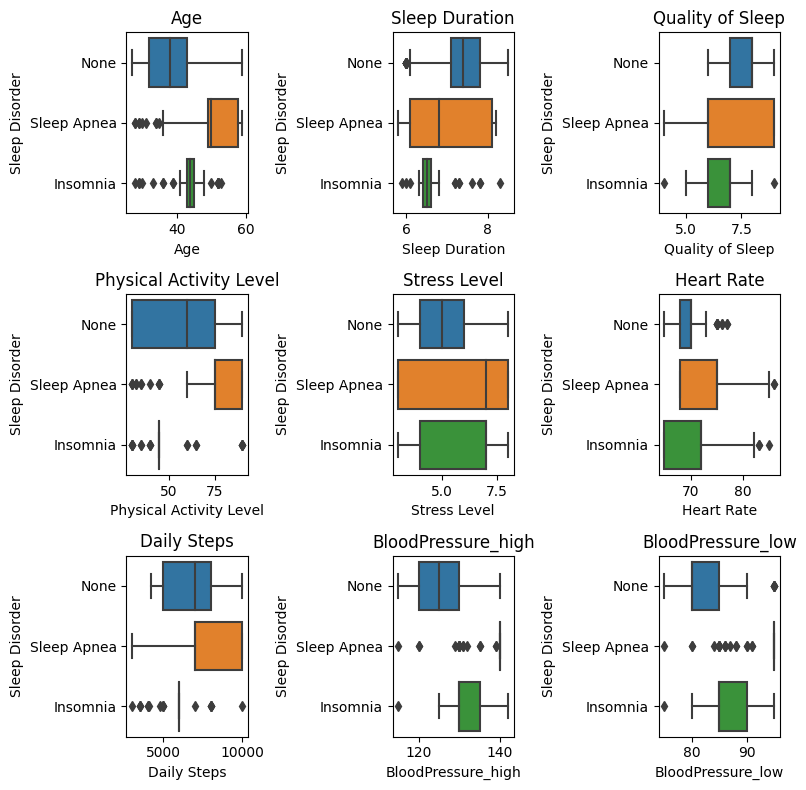

In [46]:
fig = plt.figure(figsize=(8,8))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['Sleep Disorder'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

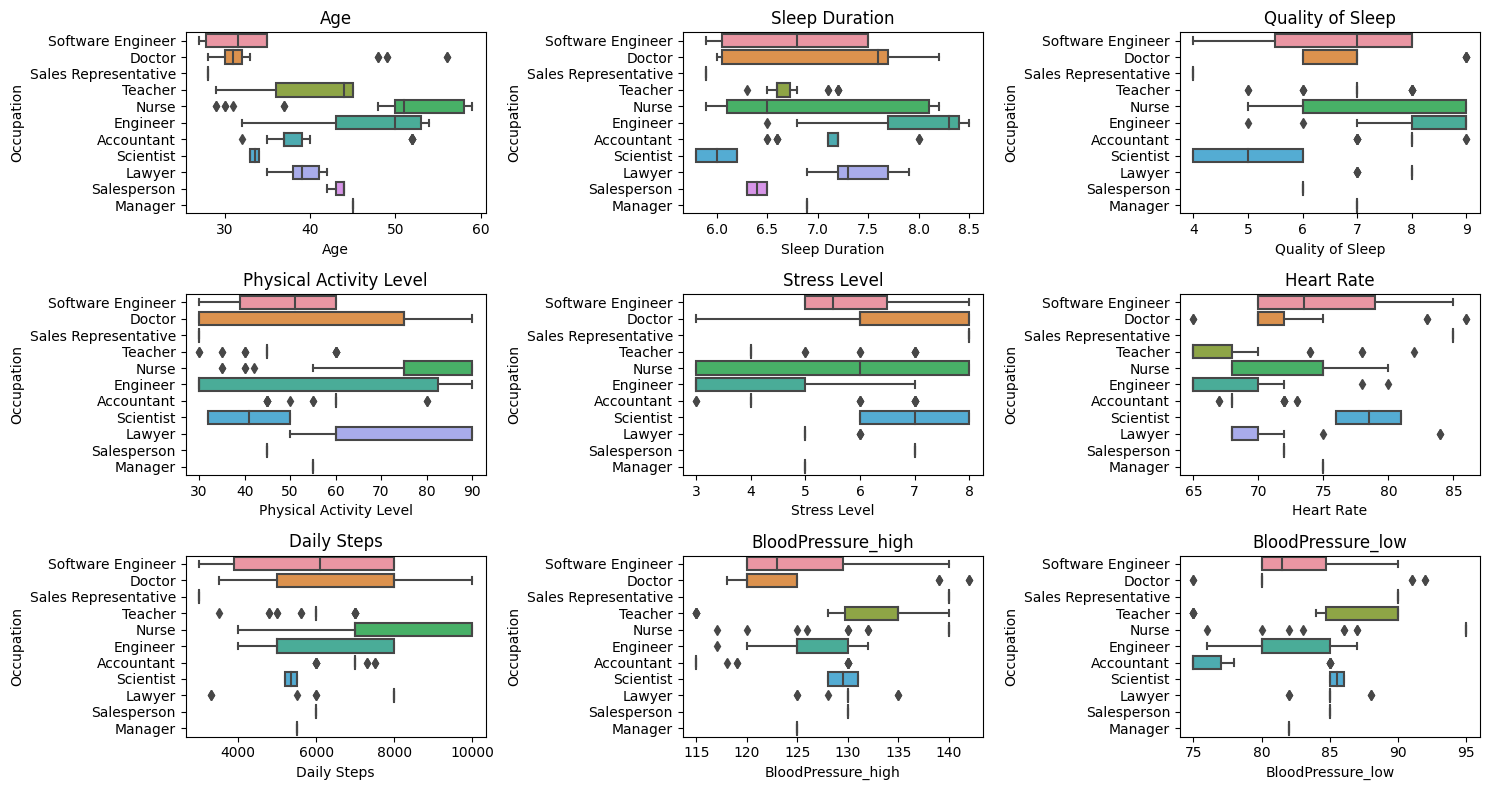

In [47]:
fig = plt.figure(figsize=(15,8))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['Occupation'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

In [74]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [75]:
df1['Sleep Disorder'], label_des = pd.factorize(df1['Sleep Disorder'])
df1['Occupation'], occp_des = pd.factorize(df1['Occupation'])
df1['BMI Category'], bmi_des = pd.factorize(df1['BMI Category'])



In [76]:
label_des, occp_des, bmi_des

(Index(['None', 'Sleep Apnea', 'Insomnia'], dtype='object'),
 Index(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer', 'Salesperson',
        'Manager'],
       dtype='object'),
 Index(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype='object'))

In [77]:
df1.drop(['Person ID'],axis=1, inplace=True)
gender =  pd.get_dummies(df1['Gender'])
df1 = pd.concat([df1, gender],axis=1)
df1.drop(['Gender'], axis=1, inplace=True)
df1

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low,Female,Male
0,27,0,6.1,6,42,6,0,77,4200,0,126.0,83.0,0,1
1,28,1,6.2,6,60,8,1,75,10000,0,125.0,80.0,0,1
2,28,1,6.2,6,60,8,1,75,10000,0,125.0,80.0,0,1
3,28,2,5.9,4,30,8,2,85,3000,1,140.0,90.0,0,1
4,28,2,5.9,4,30,8,2,85,3000,1,140.0,90.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,4,8.1,9,75,3,0,68,7000,1,140.0,95.0,1,0
370,59,4,8.0,9,75,3,0,68,7000,1,140.0,95.0,1,0
371,59,4,8.1,9,75,3,0,68,7000,1,140.0,95.0,1,0
372,59,4,8.1,9,75,3,0,68,7000,1,140.0,95.0,1,0


In [78]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning

import warnings

In [79]:

# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'label'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('int') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    train_test_dict['test_x'] = X_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = X_train
    train_test_dict['train_y'] = y_train

    return train_test_dict

train_test_dict = data_split(input_df=df1, y_col='Sleep Disorder')

### KNN Classifier Hyperparams tuning

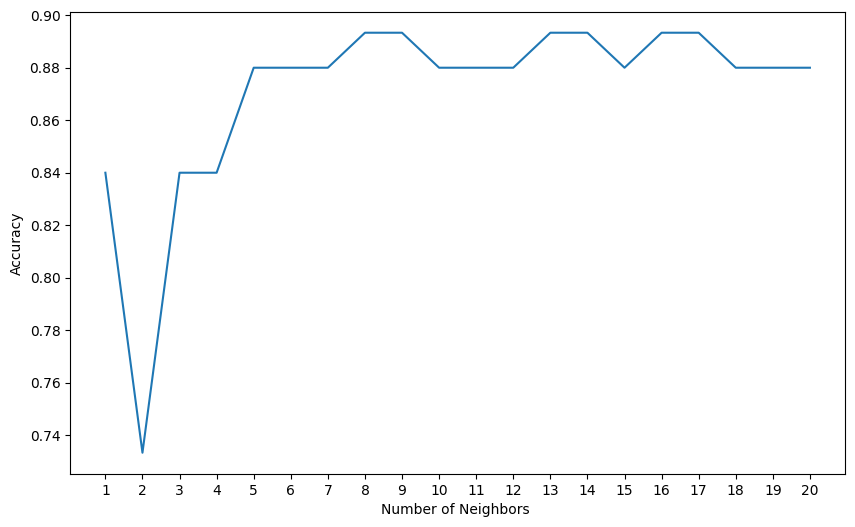

[0.84       0.73333333 0.84       0.84       0.88       0.88
 0.88       0.89333333 0.89333333 0.88       0.88       0.88
 0.89333333 0.89333333 0.88       0.89333333 0.89333333 0.88
 0.88       0.88      ]


In [80]:
knn = KNeighborsClassifier()
mean_acc = np.zeros(20)

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(train_test_dict['train_x'],train_test_dict['train_y'])
    yhat= knn.predict(train_test_dict['test_x'])
    mean_acc[i-1] = accuracy_score(train_test_dict['test_y'], yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
print(mean_acc) 

In [82]:
knn_grid_params = {'n_neighbors' : [8,9,13],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gscv = GridSearchCV(KNeighborsClassifier(), knn_grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gscv.fit(train_test_dict['train_x'], train_test_dict['train_y'])
print(g_res.best_score_)
print(g_res.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.8863299663299663
{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


Training set accuracy:  0.8963210702341137
Test set accuracy:  0.8933333333333333
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.80      0.94      0.86        17
           2       0.94      0.75      0.83        20

    accuracy                           0.89        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.90      0.89      0.89        75



d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


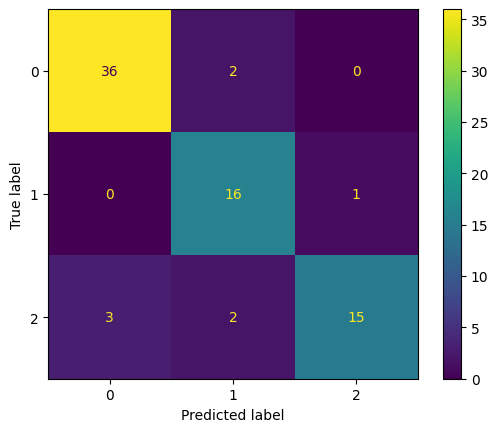

In [83]:
knn = KNeighborsClassifier(n_neighbors = g_res.best_params_['n_neighbors'], 
                           weights = g_res.best_params_['weights'],
                           algorithm = 'brute',
                           metric = g_res.best_params_['metric'])
knn.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = knn.predict(train_test_dict['train_x'])
y_knn = knn.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_knn))
plot_confusion_matrix(knn, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_knn))
plt.show()


### KNN Classifier

#### Hyper Parameters Tuning

- Neighbor 1~20 까지 설정하여 최적의 Neighbor수 찾는다. -> N = [8,9,13]

- KNN Modeling에 영향을 미치는 parameters(위에서 찾은 Neighbor 수 포함)를 dict 형식으로 구성 뒤 GridSearch Cross Validation 기법을 활용하여 최적의 parameter를 확보한다.

→ best params : {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}

#### Model Training

- 확보된 Parameter를 활용하여, KNN Classifier 학습 진행함.

→ 결과 : Training accuracy: 89.6% / Test accuracy: 89.33%


In [84]:
import xgboost as xgb


xgb_params = {'max_depth': [3, 6, 10, 15],
         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.5, 1.0, 0.1),
         'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
         'n_estimators': [100, 250, 500, 750],
         'num_class': [10]
        }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
rs_cv = RandomizedSearchCV(estimator=xgbclf, param_distributions=xgb_params, scoring='accuracy',n_iter=25,n_jobs=4, verbose=1)

rs_res =rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])

print("Best: %f using %s" % (rs_res.best_score_, rs_res.best_params_))

means = rs_res.cv_results_['mean_test_score']
stds = rs_res.cv_results_['std_test_score']
params = rs_res.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.919831 using {'subsample': 0.6, 'num_class': 10, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}
0.909774 (0.051107) with: {'subsample': 0.8999999999999999, 'num_class': 10, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8999999999999999}
0.889605 (0.047904) with: {'subsample': 0.5, 'num_class': 10, 'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8999999999999999}
0.913164 (0.038426) with: {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 100, 'ma

In [90]:
rs_res.best_params_

{'subsample': 0.6,
 'num_class': 10,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.8999999999999999}

[23:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set accuracy:  0.9331103678929766
Test set accuracy:  0.92


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.80      0.94      0.86        17
           2       0.94      0.80      0.86        20

    accuracy                           0.92        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.93      0.92      0.92        75



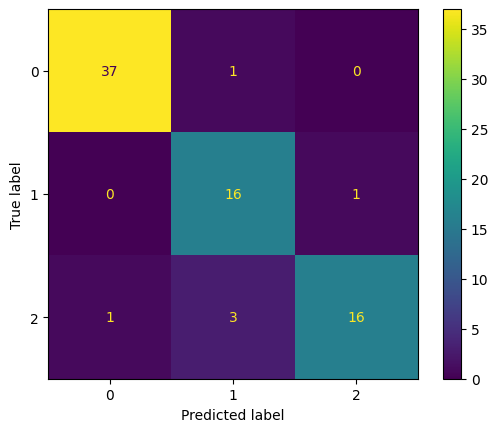

In [85]:

xgb_clf = xgb.XGBClassifier(objective="multi:softmax",
                            subsample=rs_res.best_params_['subsample'], num_class=rs_res.best_params_['num_class'], n_estimators=rs_res.best_params_['n_estimators'],
                            max_depth=rs_res.best_params_['max_depth'], learning_rate=rs_res.best_params_['learning_rate'], 
                            colsample_bylevel=rs_res.best_params_['colsample_bylevel'])

xgb_clf.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = xgb_clf.predict(train_test_dict['train_x'])
y_xgb = xgb_clf.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_xgb))
plot_confusion_matrix(xgb_clf, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_xgb))
plt.show()

#### XGBoost

- 사용이유 : Boosting 계열 중 성능이 뛰어난 Xgboost를 사용하여 학습 진행함.

#### Hyper Parameters Tuning

- XGBOOST Model에 영향을 미치는 parameters를 dict 형식으로 구성 함. 이때 영향을 미치는 parameter의 수가 많으므로 GridSearch 접근 시 Parameter 최적화에 오랜 시간이 걸리므로, 
각 반복마다 임의의 값만 대입하여 최적 값을 찾아내는 Random Search 방식의 최적화 기법을 사용했음.

→ best params :{'subsample': 0.6,
 'num_class': 10,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.8999999999999999}


##### Modeling

- 확보된 Parameter를 활용하여, Xgboost Classifier 학습 진행함.

→ 결과 : training Acc: 93.3% / Test accuracy: 92%